<a href="https://www.kaggle.com/code/omarjfr/twitt-sentiment-analysis?scriptVersionId=160751611" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import datasets,models,layers
import tensorflow as tf
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from keras.utils import plot_model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',encoding = 'latin',header=None)

In [3]:
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
df = df[[5, 0]]
df.columns=['tweet', 'Sentiment']

In [5]:
df['Sentiment'].unique()

array([0, 4])

### 0 -> indicates negative
### 4 -> indicates positive

Text(0.5, 1.0, 'Sentiment Field Distribution\n800000\n800000')

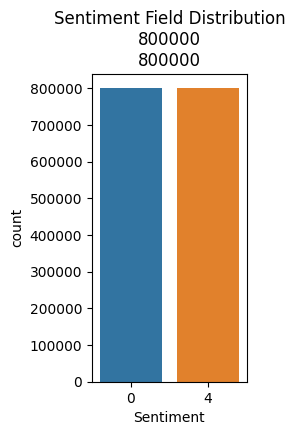

In [6]:
val_count=df["Sentiment"].value_counts()
plt.figure(figsize= (2,4))
sns.countplot(data = df, x= 'Sentiment')
plt.title(f'Sentiment Field Distribution\n{val_count.to_string(index=False, header=None)}')

In [7]:
# Mapping the 4 by 1
df.loc[df["Sentiment"] == 4, "Sentiment"] = 1

In [8]:
df['Sentiment'].unique()

array([0, 1])

### Regular Expression to clean text by removing urls, emojis, html tags and punctuations.

In [9]:
stop_words = set(stopwords.words('english'))
def clean_text(sentence):
    # Removing URLS
    sentence = re.sub(r"https?://\S+|www\.\S+"," ",sentence)
    
    # Removing html tags
    sentence = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});"," ",sentence)
    
    # Removing the Punctuation
    sentence = re.sub(r"[^\w\s]", " ", sentence)
        
    # Removing words that have numbers 
    sentence = re.sub(r"\w*\d\w*", " ", sentence)
        
    # Removing Digits 
    sentence = re.sub(r"[0-9]+", " ", sentence)
        
    # Cleaning white spaces
    sentence = re.sub(r"\s+", " ", sentence).strip()
        
    sentence = sentence.lower()
    # Check stop words
    tokens = []
    for token in sentence.split():
        if token not in stop_words:
            tokens.append(token)
    return " ".join(tokens) 

In [10]:
df.loc[:, 'tweet'] = df['tweet'].apply(clean_text)

In [11]:
df.sample(5)

,tweet,Sentiment
245727,ahhh wish could breathe,0
85468,give seafood sushi roasted duck seafood salad ...,0
119671,whoa cant believe london broke daisys heart,0
1046087,changing bg youtube,1
55169,neumen lol nope trying dm never tweet anymore,0


### Now, We visualise some Possitive Words...

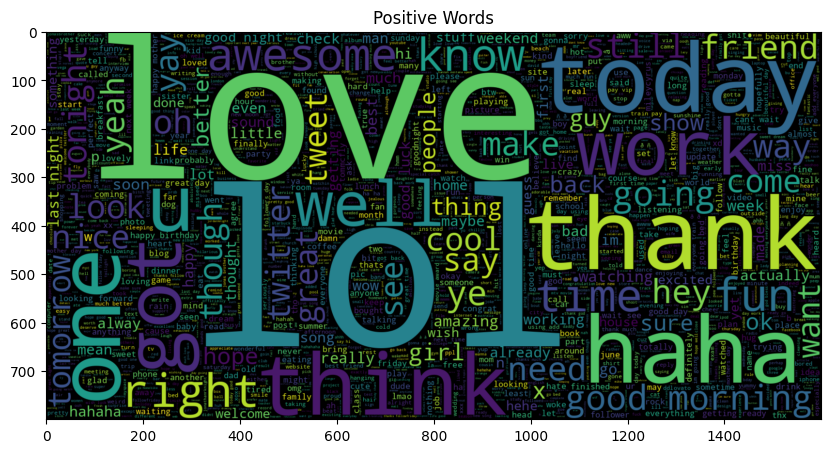

In [12]:
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Sentiment == 1].tweet))
plt.title("Positive Words")
plt.imshow(wc , interpolation = 'bilinear')

### Negative words >>

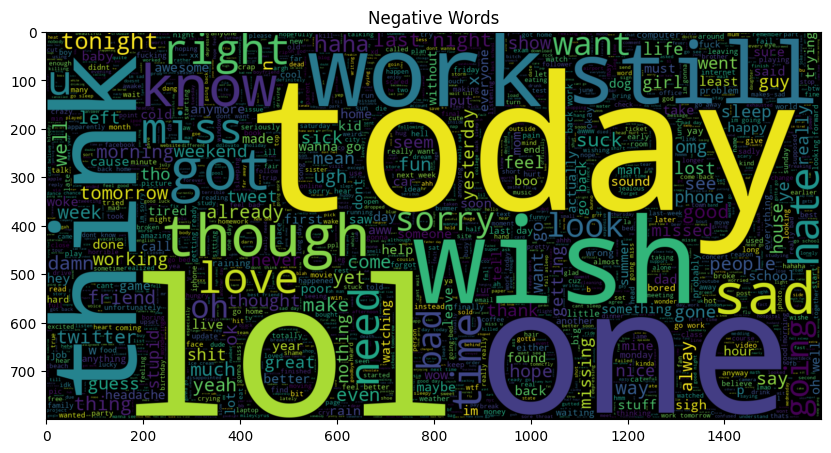

In [13]:
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Sentiment == 0].tweet))
plt.title("Negative Words")
plt.imshow(wc , interpolation = 'bilinear')

### Train Test Split

In [14]:
X = df['tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print("Train Data size:", len(X_train), len(y_train))
print("Test Data size", len(X_test), len(y_test))

Train Data size: 1280000 1280000
Test Data size 320000 320000


### Tokenizer -> It assigns a unique integer index to each unique word in the text.

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


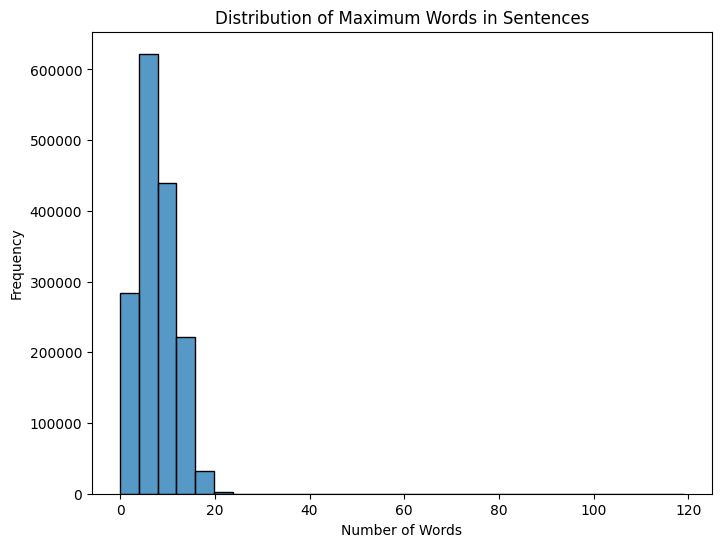

In [16]:
max_words = df['tweet'].apply(lambda x: len(x.split()))

# Plotting the distribution of the maximum number of words in sentences
plt.figure(figsize=(8, 6))
sns.histplot(max_words, bins=30)
plt.title('Distribution of Maximum Words in Sentences')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### Hyperparameters ->>

In [17]:
max_len = 40  # Maximum words in each sequence.
batch_size=512

### Padding ->>>

In [18]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [19]:
print(f"After padding: {X_train.shape}")
print(f"After padding:{X_test.shape}")

After padding: (1280000, 40)
After padding:(320000, 40)


In [20]:
vocabulary_size = len(tokenizer.word_index)
vocabulary_size

458537

In [21]:
embedding_dim=100
input_dim=1
input_shape = (max_len, input_dim)

### Embedding(input_dim,output_dim,input_length)
input_dim -> Categories that encoding


In [22]:
CNN=models.Sequential([
    layers.Embedding(vocabulary_size, embedding_dim, input_length=max_len,trainable=False),
#     layers.Dropout(0.5),
    
    layers.Conv1D(filters=128,kernel_size=7,activation='relu'),
    layers.Conv1D(filters=128,kernel_size=7,activation='relu'),
    layers.GlobalMaxPooling1D(),
    
    layers.Flatten(),
    layers.Dense(1024,activation="relu"),
    layers.Dropout(0.5),
    
    layers.Dense(1, activation='sigmoid')
])

In [23]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           45853700  
                                                                 
 conv1d (Conv1D)             (None, 34, 128)           89728     
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 128)           114816    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1024)              132096    
                                                        

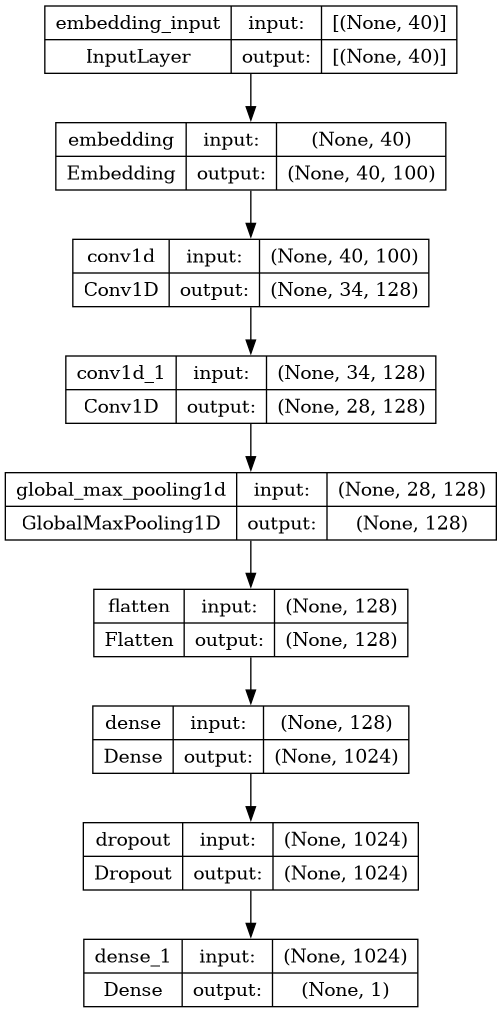

In [24]:
plot_model(CNN, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history=CNN.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),batch_size=batch_size)

Epoch 1/10
2500/2500 [==============================] - 23s 8ms/step - loss: 0.5612 - accuracy: 0.6972 - val_loss: 0.5235 - val_accuracy: 0.7336
Epoch 2/10
2500/2500 [==============================] - 19s 7ms/step - loss: 0.5080 - accuracy: 0.7454 - val_loss: 0.5077 - val_accuracy: 0.7453
Epoch 3/10
2500/2500 [==============================] - 19s 8ms/step - loss: 0.4891 - accuracy: 0.7588 - val_loss: 0.5045 - val_accuracy: 0.7472
Epoch 4/10
2500/2500 [==============================] - 19s 8ms/step - loss: 0.4760 - accuracy: 0.7681 - val_loss: 0.5034 - val_accuracy: 0.7493
Epoch 5/10
2500/2500 [==============================] - 19s 8ms/step - loss: 0.4649 - accuracy: 0.7753 - val_loss: 0.5116 - val_accuracy: 0.7463
Epoch 6/10
2500/2500 [==============================] - 19s 8ms/step - loss: 0.4546 - accuracy: 0.7820 - val_loss: 0.5089 - val_accuracy: 0.7485
Epoch 7/10
2500/2500 [==============================] - 19s 8ms/step - loss: 0.4452 - accuracy: 0.7875 - val_loss: 0.5174 - val_ac

10000/10000 [==============================] - 16s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

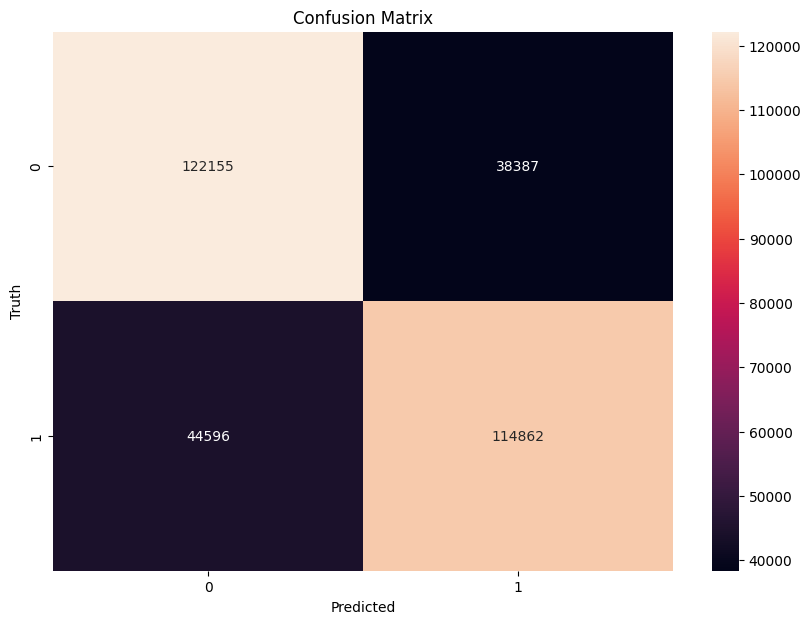

In [27]:
y_pred = CNN.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)


plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

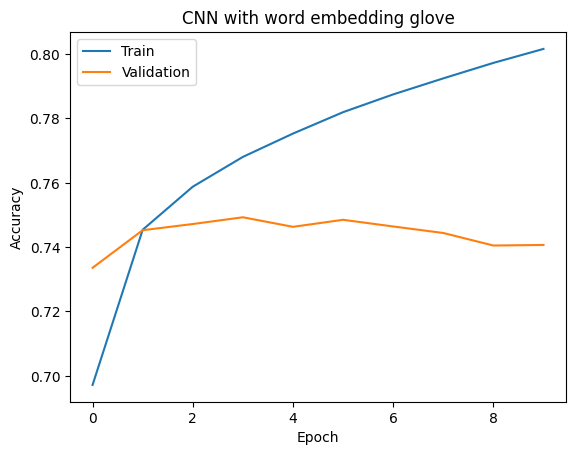

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.title('CNN with word embedding glove')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [29]:
print("Classification Report: \n", classification_report(y_test, y_pred_rounded))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.76      0.75    160542
           1       0.75      0.72      0.73    159458

    accuracy                           0.74    320000
   macro avg       0.74      0.74      0.74    320000
weighted avg       0.74      0.74      0.74    320000



### Pre-Trained Model -> BERT

In [30]:
# Data decreasing
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',encoding = 'latin',header=None)
df = df[[5, 0]]
df.columns=['tweet', 'Sentiment']
df.loc[df["Sentiment"] == 4, "Sentiment"] = 1

positive_samples = df[df['Sentiment'] == 1]
negative_samples = df[df['Sentiment'] == 0]


positive_subset = positive_samples.sample(n=100000, random_state=42)
negative_subset = negative_samples.sample(n=100000, random_state=42)

final_subset = pd.concat([positive_subset, negative_subset])
df = final_subset.sample(frac=1, random_state=42)

In [31]:
df["Sentiment"].value_counts()

Sentiment
0    100000
1    100000
Name: count, dtype: int64

In [32]:
df.loc[:, 'tweet'] = df['tweet'].apply(clean_text)

In [33]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

max_len = 40 
X_train, X_test, y_train, y_test = train_test_split(df["tweet"].tolist(), df["Sentiment"], test_size=0.2)


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case = True)


train_encodings = tokenizer(X_train, truncation=True, padding=True,max_length=max_len)
test_encodings = tokenizer(X_test, truncation=True, padding=True,max_length=max_len)

# Convert labels to TensorFlow tensors
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

# Create a TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings),y_train)).shuffle(len(X_train)).batch(4)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test)).shuffle(len(X_test)).batch(4)


model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
# Model
input_layer = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
bert_output = model(input_layer)[0]

# Adding dropout after BERT output
dropout_rate = 0.2
x = tf.keras.layers.Dropout(dropout_rate)(bert_output)

dense_layer = tf.keras.layers.Dense(128, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense_layer)

bert_model = tf.keras.models.Model(inputs=input_layer, outputs=output)

In [35]:
# Compile the model
# model=bert_model()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
bert_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

In [36]:
bert_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ids (InputLayer)      [(None, 40)]              0         
                                                                 
 tf_bert_for_sequence_class  TFSequenceClassifierOut   109483778 
 ification (TFBertForSequen  put(loss=None, logits=(             
 ceClassification)           None, 2),                           
                              hidden_states=None, at             
                             tentions=None)                      
                                                                 
 dropout_39 (Dropout)        (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 1)                 129   

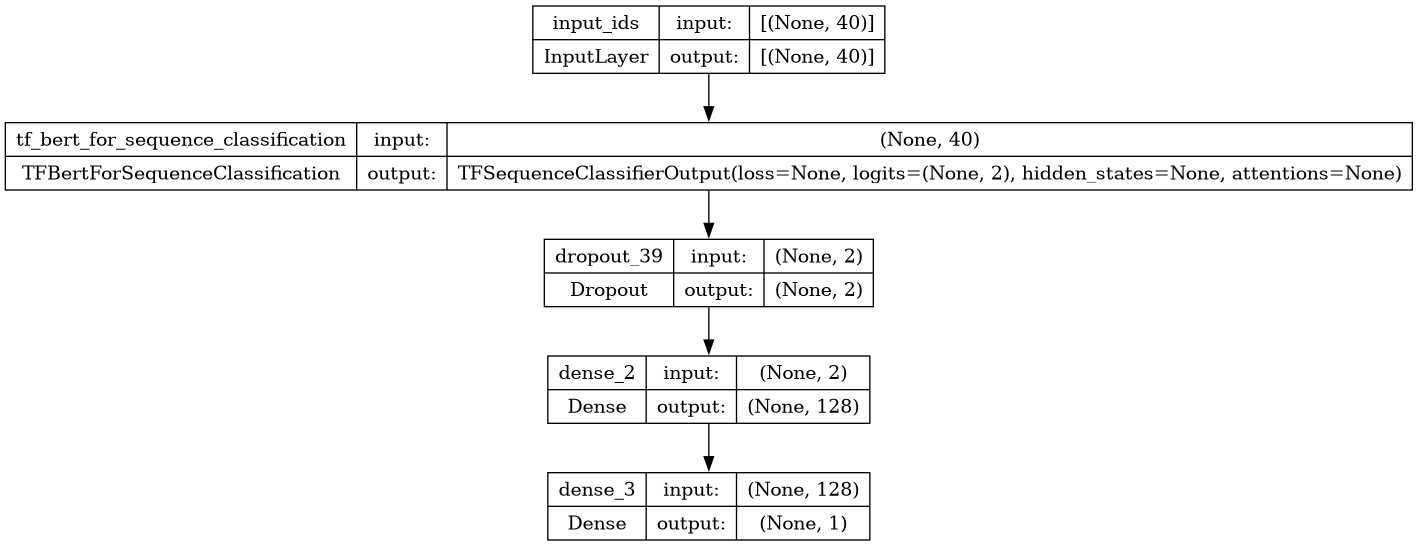

In [37]:
tf.keras.utils.plot_model(bert_model, show_shapes=True)

In [38]:
num_epochs = 4
batch_size=1024

In [39]:
%%time
history = bert_model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset,batch_size=batch_size)

Epoch 1/4


/opt/conda/lib/python3.10/site-packages/keras/src/engine/functional.py:639: UserWarning: Input dict contained keys ['token_type_ids', 'attention_mask'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


40000/40000 [==============================] - 2838s 70ms/step - loss: 0.4998 - accuracy: 0.7557 - val_loss: 0.4580 - val_accuracy: 0.7817
Epoch 2/4
40000/40000 [==============================] - 2674s 67ms/step - loss: 0.4235 - accuracy: 0.8027 - val_loss: 0.4456 - val_accuracy: 0.7893
Epoch 3/4
40000/40000 [==============================] - 2673s 67ms/step - loss: 0.3428 - accuracy: 0.8463 - val_loss: 0.4740 - val_accuracy: 0.7865
Epoch 4/4
40000/40000 [==============================] - 2644s 66ms/step - loss: 0.2546 - accuracy: 0.8907 - val_loss: 0.5635 - val_accuracy: 0.7776
CPU times: user 3h 56min 33s, sys: 22min 32s, total: 4h 19min 6s
Wall time: 3h 29s


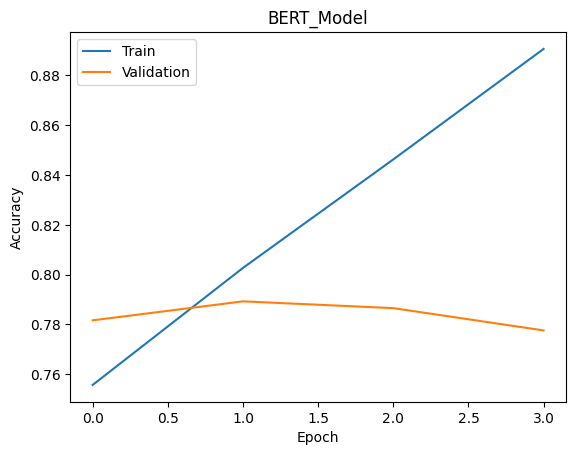

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.title('BERT_Model')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [41]:
y_pred = bert_model.predict(test_dataset)
y_pred_rounded = np.round(y_pred)
print("Classification Report: \n", classification_report(y_test, y_pred_rounded))

10000/10000 [==============================] - 259s 26ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.51      0.50     19857
           1       0.50      0.48      0.49     20143

    accuracy                           0.50     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.50      0.50      0.50     40000

